In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

from skimage.transform import resize
from sklearn.metrics import accuracy_score

In [2]:
    # Flipped Images with ratio
    def random_flipped_img(images, labels, flip_ratio):
        num_flips = int(len(images) * flip_ratio)
        random_choice = np.random.choice(len(images), num_flips, replace=False)
        new_images = []
        new_labels = []
        new_classes = []
        for i, (img,label) in enumerate(zip(images,labels)):
            if i in random_choice:
                flipped_img = np.flip(img, axis=0)
                new_images.append(flipped_img)
                new_labels.append(1) # 1 for flip
                new_classes.append(label)
            else:
                new_images.append(img)
                new_labels.append(0) # 0 for not flip
                new_classes.append(label)
        return new_images, new_labels, new_classes

    # Load dataset
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
    # Normalize the RGB values to be between 0 and 1
    train_images = train_images / 255.0
    test_images = test_images / 255.0
    # Ratio of train and test (8:2)
    train_images, test_images, train_labels, test_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)


    # Total images of train and test set after apply ratio
    total_train_num = int(len(train_images))
    total_test_num = int(len(test_images))

    print("Total images of train set:",total_train_num)
    print("Total images of test set: ", total_test_num)

    # Select random images from train set
    random_indices_train = np.random.choice(len(train_images), total_train_num, replace=False)
    selected_train_images = train_images[random_indices_train]
    selected_train_labels = train_labels[random_indices_train]

    # Select random images from test set
    random_indices_test = np.random.choice(len(test_images), total_test_num, replace=False)
    selected_test_images = test_images[random_indices_test]
    selected_test_labels = test_labels[random_indices_test]

    # Fiptting ratio
    flip_ratio = 0.5
    # train - images and labels after flippting randomly
    flipped_train_images, flipped_train_labels, flipped_train_classes = random_flipped_img(selected_train_images, selected_train_labels, flip_ratio)

    # test - images and labels after flippting randomly
    flipped_test_images, flipped_test_labels, flipped_test_classes = random_flipped_img(selected_test_images, selected_test_labels, flip_ratio)

Total images of train set: 48000
Total images of test set:  12000


In [3]:
# Resize images
def resize_images(images):
    resized_images = []
    for image in images:
        resized_image = resize(image, (28, 28))
        if len(resized_image.shape) == 2:
            resized_image = np.expand_dims(resized_image, axis=-1)
        resized_image = np.mean(resized_image, axis=2) 
        resized_images.append(resized_image)
    return np.array(resized_images)

# Convert to numpy arrays and normalize
train_images = np.array(flipped_train_images) / 255.0
train_labels = np.array(flipped_train_labels)
train_classes = np.array(flipped_train_classes)

test_images = np.array(flipped_test_images) / 255.0
test_labels = np.array(flipped_test_labels)
test_classes = np.array(flipped_test_classes)

train_images_resized = resize_images(train_images)
test_images_resized = resize_images(test_images)
input_shape = train_images_resized[0].shape

# Adjust Values
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = 0.0005,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=True)

# Define CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    #tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    #tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    #tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(
    train_images_resized,
    train_labels,
    epochs=10,
    batch_size=64, # 16 32 64 128 256 vv 
    validation_data=(test_images_resized, test_labels)
)

c:\Users\hieun\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.5180 - loss: 0.8251 - val_accuracy: 0.7759 - val_loss: 0.4463
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.8212 - loss: 0.3881 - val_accuracy: 0.8957 - val_loss: 0.2340
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.8838 - loss: 0.2571 - val_accuracy: 0.9086 - val_loss: 0.2114
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9052 - loss: 0.2159 - val_accuracy: 0.9183 - val_loss: 0.1818
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9199 - loss: 0.1881 - val_accuracy: 0.9411 - val_loss: 0.1442
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9351 - loss: 0.1587 - val_accuracy: 0.9579 - val_loss: 0.1200
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9395 - loss: 0.1493 - val_accuracy: 0.9582 - val_loss: 0.1156
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9486 - loss: 0.1313 - 

In [4]:
# CNN prediction
predicted_labels = []

for i in range(len(test_images_resized)):
    # Make prediction on a single image
    prediction = model.predict(np.expand_dims(test_images_resized[i], axis=0))
    # Add label after prediction into array
    predicted_label = np.argmax(prediction)
    predicted_labels.append(predicted_label)

print("Predicted labels of images:", predicted_labels)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predicted_labels)
print("Accuracy:", accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Define Random Forest model
# Increase accuracy => increase number of trees
RF = RandomForestClassifier(n_estimators=100, random_state=20)

# Flatten the images for compatibility with non-CNN models
train_images_flattened = tf.reshape(train_images_resized, (train_images_resized.shape[0], -1))
test_images_flattened = tf.reshape(test_images_resized, (test_images_resized.shape[0], -1))
# Train the Random Forest Classifier
RF.fit(train_images_flattened, train_labels)
# Random Forest Prediction -> Use as Replace Solution -> Will be update on future later
predicted_labels_RF = RF.predict(test_images_flattened)
# Calculate accuracy
accuracy = accuracy_score(test_labels, predicted_labels_RF)
print(test_labels)
print(predicted_labels_RF)
print("Accuracy:", accuracy)

[1 0 0 ... 0 0 1]
[1 0 0 ... 0 0 1]
Accuracy: 0.9856666666666667


In [30]:
from collections import Counter

classes = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

# Mapping predicted labels to class names
predicted_class_names = [classes[label] for label in flipped_test_classes]

# Count occurrences of each class in predicted class names
class_counts = Counter(predicted_class_names)

# Display class counts
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} occurrences")
    
predicted_sum = []
for i in range (len(predicted_labels)):
    if predicted_labels[i] == predicted_labels_RF[i]:
        predicted_sum.append(predicted_labels[i])
    else:
        # Check if the true label is diffrent with the prediction of CNN or Random Forest
        if flipped_test_labels[i] != predicted_labels[i]:
            predicted_sum.append(predicted_labels[i])
        if flipped_test_labels[i] != predicted_labels_RF[i]:
            predicted_sum.append(predicted_labels_RF[i])

# Initialize a dictionary to store misclassification counts for each class
class_misclassified_counts = {class_name: {'count': 0, 'positions': []} for class_name in classes.values()}

# Iterate through true labels and predicted labels simultaneously
for i, (true_label, predicted_label, class_name) in enumerate(zip(flipped_test_labels, predicted_sum, predicted_class_names)):
    if true_label != predicted_label:
        class_misclassified_counts[class_name]['count'] += 1
        class_misclassified_counts[class_name]['positions'].append(i)

print("\n")
# Display misclassification counts for each class
for class_name, info in class_misclassified_counts.items():
    print(f"Class: {class_name}, Misclassified Count: {info['count']}, Positions: {info['positions']}")


# Sort the misclassification counts dictionary by count in descending order
sorted_misclassified_counts = sorted(class_misclassified_counts.items(), key=lambda x: x[1]['count'], reverse=True)

# Display the top 3 classes with the highest misclassification counts
print("\n\nTop 3 classes with the highest misclassification counts:")
for i, (class_name, info) in enumerate(sorted_misclassified_counts[:3]):
    print(f"{i+1}. Class: {class_name}, Misclassified Count: {info['count']}, Positions: {info['positions']}")
    
    

T-Shirt: 1202 occurrences
Pullover: 1205 occurrences
Bag: 1197 occurrences
Trouser: 1219 occurrences
Ankle Boot: 1203 occurrences
Coat: 1202 occurrences
Sandal: 1211 occurrences
Sneaker: 1159 occurrences
Dress: 1184 occurrences
Shirt: 1218 occurrences


Class: T-Shirt, Misclassified Count: 70, Positions: [0, 267, 431, 955, 1009, 1015, 1689, 1703, 1843, 1977, 2208, 3018, 3278, 3509, 3782, 3856, 4667, 4687, 5080, 5094, 5189, 5382, 5445, 5457, 5475, 5485, 5642, 5690, 5742, 5783, 5936, 5958, 5977, 7149, 7275, 7287, 7299, 7377, 7696, 7743, 8148, 8451, 8502, 8548, 8569, 8611, 8656, 8798, 9291, 9461, 9580, 9709, 9744, 9834, 9929, 10334, 10550, 10647, 10688, 10751, 10889, 11114, 11390, 11417, 11427, 11496, 11655, 11658, 11834, 11912]
Class: Trouser, Misclassified Count: 33, Positions: [586, 1227, 1349, 1474, 2901, 3276, 3304, 3317, 3465, 3621, 4172, 4228, 4727, 4797, 5351, 5385, 6414, 6706, 6707, 6947, 7051, 7466, 8159, 8256, 8695, 10412, 10672, 10904, 11116, 11198, 11285, 11482, 11946]
Class:

C:\Users\hieun\AppData\Local\Temp\ipykernel_18928\1363207793.py:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, num_images_per_class, i * num_images_per_class + j + 1)


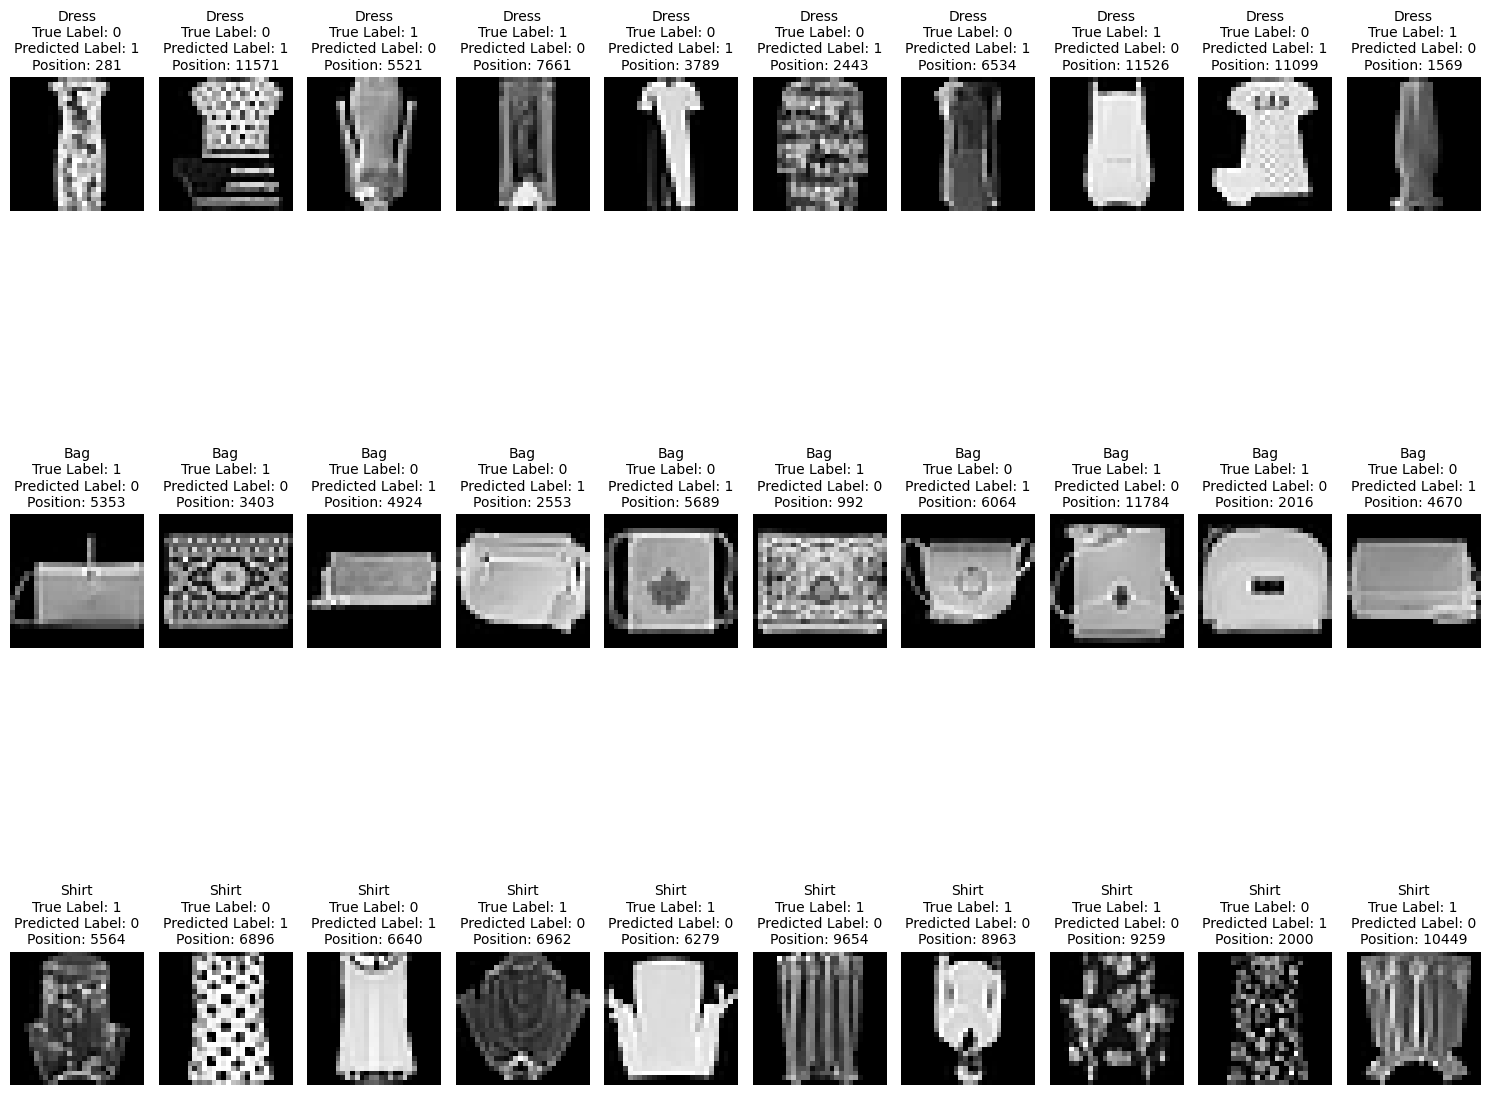

In [26]:
import random
import matplotlib.pyplot as plt

selected_positions = []

num_images_per_class = 10

# Iterate through the top 3 misclassified classes
for class_name, info in sorted_misclassified_counts[:3]:
    # Shuffle the positions for each class
    random.shuffle(info['positions'])
    # Select up to num_images_per_class positions from each class
    selected_positions.extend(info['positions'][:num_images_per_class])

# Plot 10 random images from each of the top 3 misclassified classes
plt.figure(figsize=(15, 15))
for i, (class_name, info) in enumerate(sorted_misclassified_counts[:3]):
    # Shuffle the positions for each class
    random.shuffle(info['positions'])
    # Select up to num_images_per_class positions from each class
    class_selected_positions = info['positions'][:num_images_per_class]
    plt.subplot(3, 1, i + 1)
    for j, position in enumerate(class_selected_positions):
        plt.subplot(3, num_images_per_class, i * num_images_per_class + j + 1)
        plt.imshow(flipped_test_images[position], cmap='gray')
        plt.title(f"{class_name}\nTrue Label: {flipped_test_labels[position]}\nPredicted Label: {predicted_sum[position]}\nPosition: {position}", fontsize=10)
        plt.axis('off')

plt.tight_layout()
plt.show()
